In [170]:
from pathlib import Path
import pandas as pd
import geopandas as gpd
import swifter

import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from convertbng.util import convert_bng, convert_lonlat

plt.style.use("seaborn-poster")
plt.style.use("seaborn-colorblind")

#plt.rcParams['figure.dpi'] = 600

In [2]:
df_population = pd.read_csv("Data/PC_sectors.csv")
#df_population = df_population.iloc[0:100]

In [6]:
def postcode_shorten(postcode):
    return postcode[0:5]

header = ["Postcode", "Positional_quality_indicator", "Eastings", "Northings", "Country_code", "NHS_regional_HA_code", "NHS_HA_code", "Admin_county_code", "Admin_district_code", "Admin_ward_code"]

paths = Path("Data/Data/CSV").glob("*")

df_position = pd.concat((pd.read_csv(p, header=None, names=header) for p in paths))

# Set PC Sectors
df_position["_PC"] = df_position["Postcode"].map(postcode_shorten)

# Convert to GDF and add coordinates in lat/long
gdf_position = gpd.GeoDataFrame(df_position, geometry=gpd.points_from_xy(df_position.Eastings, df_position.Northings))
gdf_position = gdf_position.set_crs(epsg=27700)
gdf_position = gdf_position.to_crs(epsg=4326)

In [7]:
gdf_position

Postcode  Positional_quality_indicator  Eastings  Northings Country_code  \
0    AB101AB                            10    394235     806529    S92000003   
1    AB101AF                            10    394181     806429    S92000003   
2    AB101AG                            10    394230     806469    S92000003   
3    AB101AH                            10    394371     806359    S92000003   
4    AB101AL                            10    394296     806581    S92000003   
..       ...                           ...       ...        ...          ...   
646  ZE3 9JU                            10    438872    1111807    S92000003   
647  ZE3 9JW                            10    438975    1110038    S92000003   
648  ZE3 9JX                            10    438872    1110219    S92000003   
649  ZE3 9JY                            10    438498    1112029    S92000003   
650  ZE3 9JZ                            10    438662    1112122    S92000003   

    NHS_regional_HA_code NHS_HA_code Admin_county_code Admin_district_code  \
0                    NaN   S08000020               NaN           S12000033   
1                    NaN   S08000020               NaN           S12000033   
2                    NaN   S08000020               NaN           S12000033   
3                    NaN   S08000020               NaN           S12000033   
4                    NaN   S08000020               NaN           S12000033   
..                   ...         ...               ...                 ...   
646                  NaN   S08000026               NaN           S12000027   
647                  NaN   S08000026               NaN           S12000027   
648                  NaN   S08000026               NaN           S12000027   
649                  NaN   S08000026               NaN           S12000027   
650                  NaN   S08000026               NaN           S12000027   

    Admin_ward_code    _PC                   geometry  
0         S13002842  AB101  POINT (-2.09692 57.14961)  
1         S13002842  AB101  POINT (-2.09781 57.14871)  
2         S13002842  AB101  POINT (-2.09700 57.14907)  
3         S13002842  AB101  POINT (-2.09466 57.14808)  
4         S13002842  AB101  POINT (-2.09591 57.15007)  
..              ...    ...                        ...  
646       S13002776  ZE3 9  POINT (-1.30721 59.88954)  
647       S13002776  ZE3 9  POINT (-1.30570 59.87365)  
648       S13002776  ZE3 9  POINT (-1.30750 59.87529)  
649       S13002776  ZE3 9  POINT (-1.31385 59.89157)  
650       S13002776  ZE3 9  POINT (-1.31090 59.89239)  

[1714213 rows x 12 columns]

<AxesSubplot:>

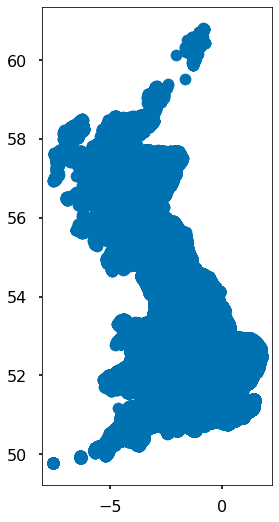

In [8]:
gdf_position.plot()

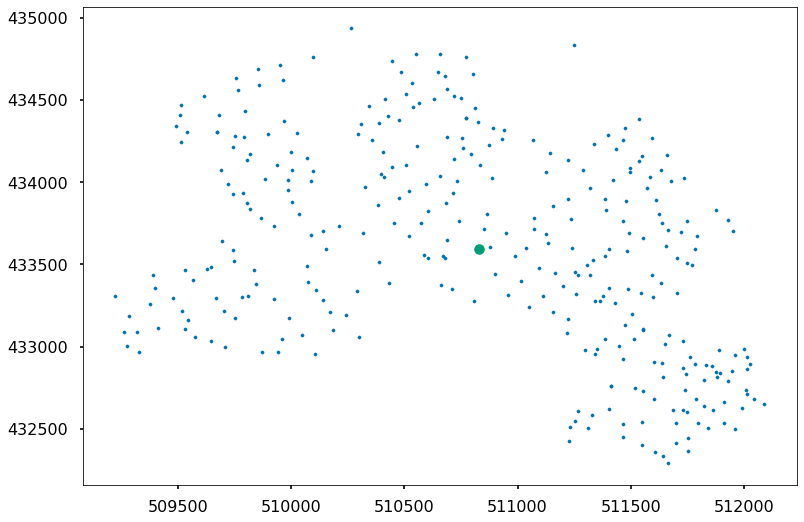

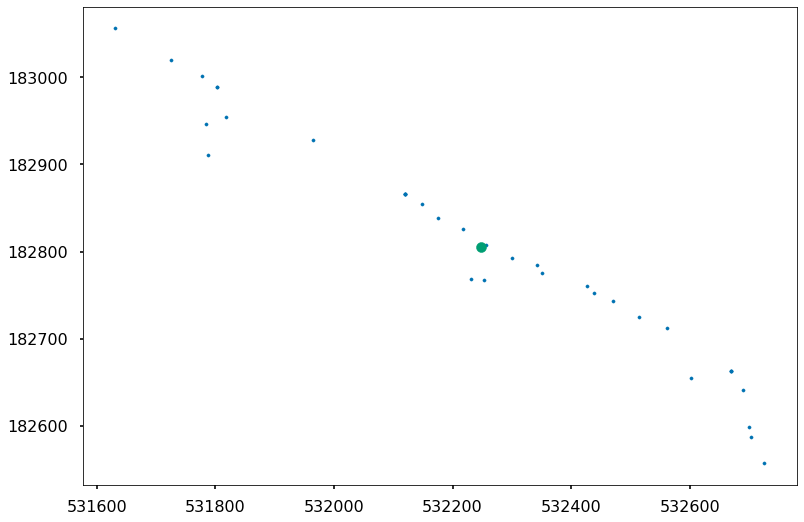

(532248.4, 182805.6)

In [9]:
def avergage_postion_of_sector(sector, df=df_position, plot=False):
    """Convert district to average PC position"""
    sector = sector[0:4] + sector[-1]
    df = df[df._PC == sector]
    
    if plot:
        plt.scatter(df.Eastings, df.Northings, s=10)
        plt.scatter(df.Eastings.mean(), df.Northings.mean(), s=100, c="C1")
        plt.show()
    
    return np.mean(df.Eastings), np.mean(df.Northings)

avergage_postion_of_sector("HU7 4", plot=True)
avergage_postion_of_sector("EC1V 2", plot=True)

In [10]:
df_population["Eastings"],  df_population["Northings"] = zip(*df_population["geography"].swifter.apply(avergage_postion_of_sector))

Pandas Apply:   0%|          | 0/8035 [00:00<?, ?it/s]

In [11]:
_df_population = df_population

In [137]:
df_population = _df_population

<AxesSubplot:>

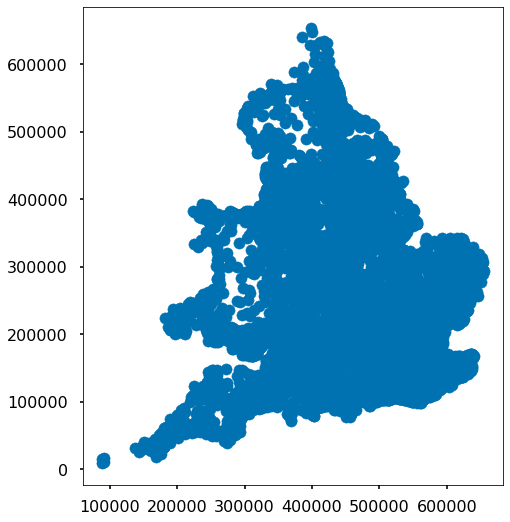

In [228]:
#df_population = df_population[(df_population.Eastings.between(300000, 400000)) & (df_population.Northings.between(300000, 400000))]
#df_population = df_population.iloc[0:20]

#df_population["Longitude"], df_population["Latitude"] = convert_lonlat(df_population.Eastings, df_population.Northings)

gdf_population = gpd.GeoDataFrame(df_population, geometry=gpd.points_from_xy(df_population.Eastings, df_population.Northings))
gdf_population = gdf_population.set_crs(epsg=27700)
gdf_population["Station"] = False
gdf_population = gdf_population.sort_values("Variable: All usual residents; measures: Value", ascending=False).reset_index(drop=True)

gdf_population.plot()

0


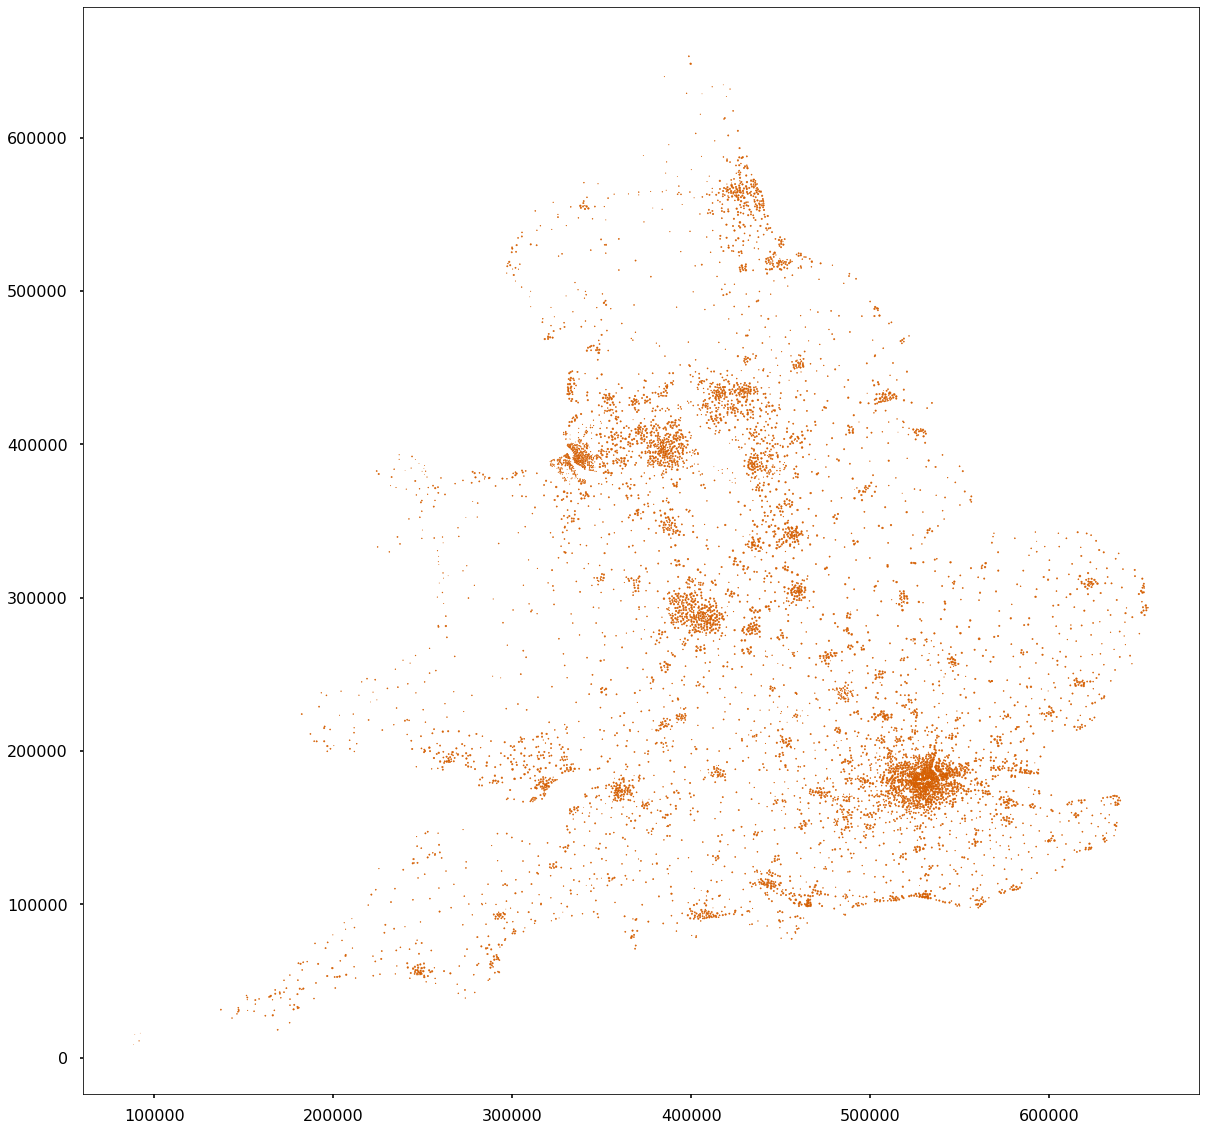

1000


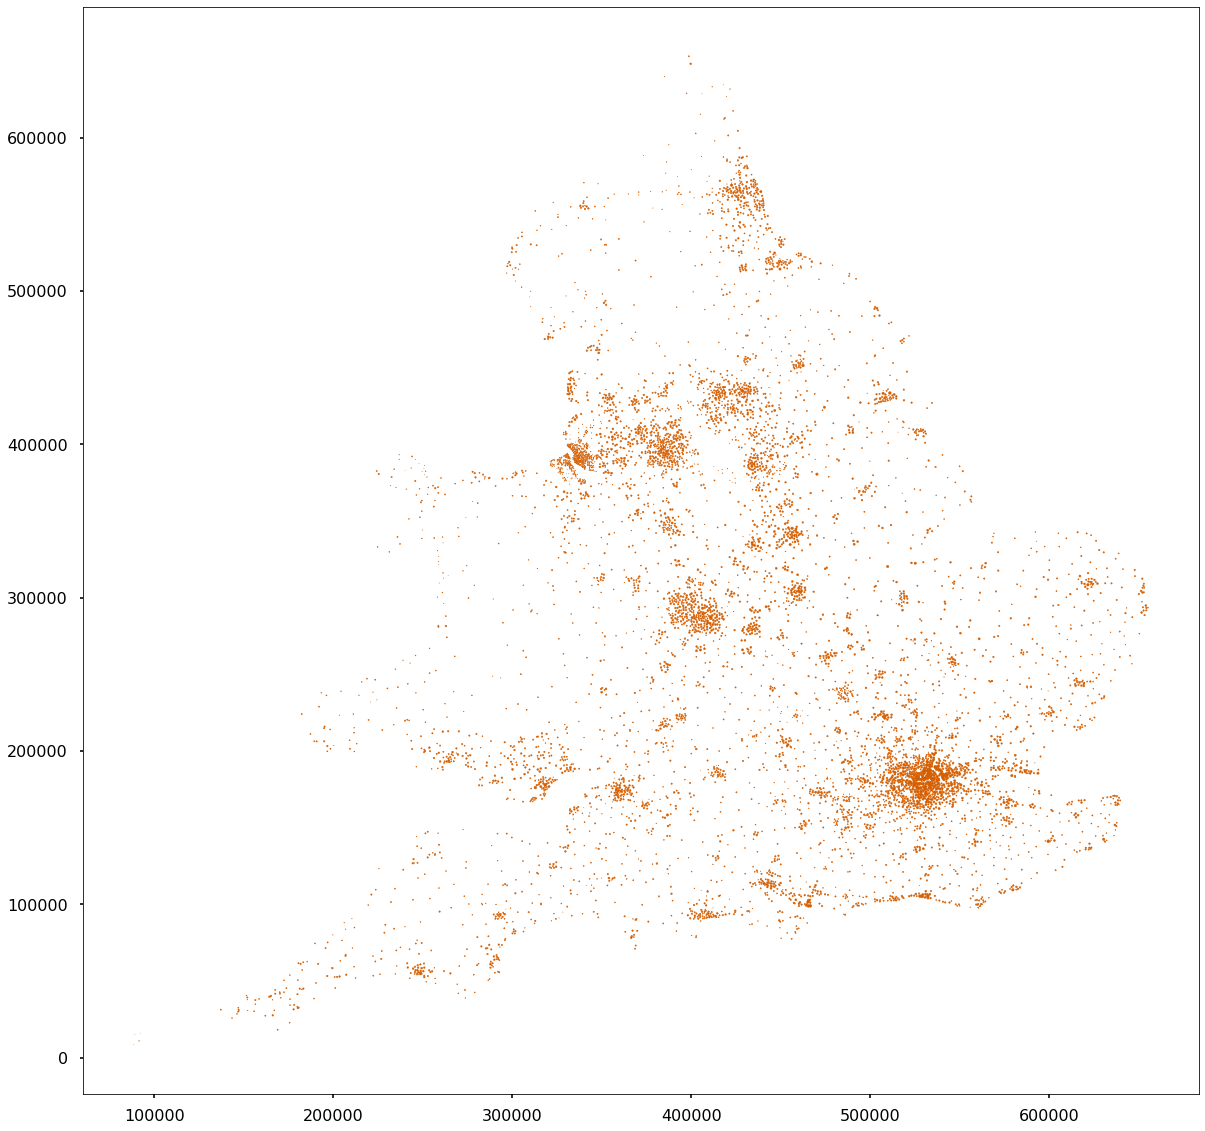

2000


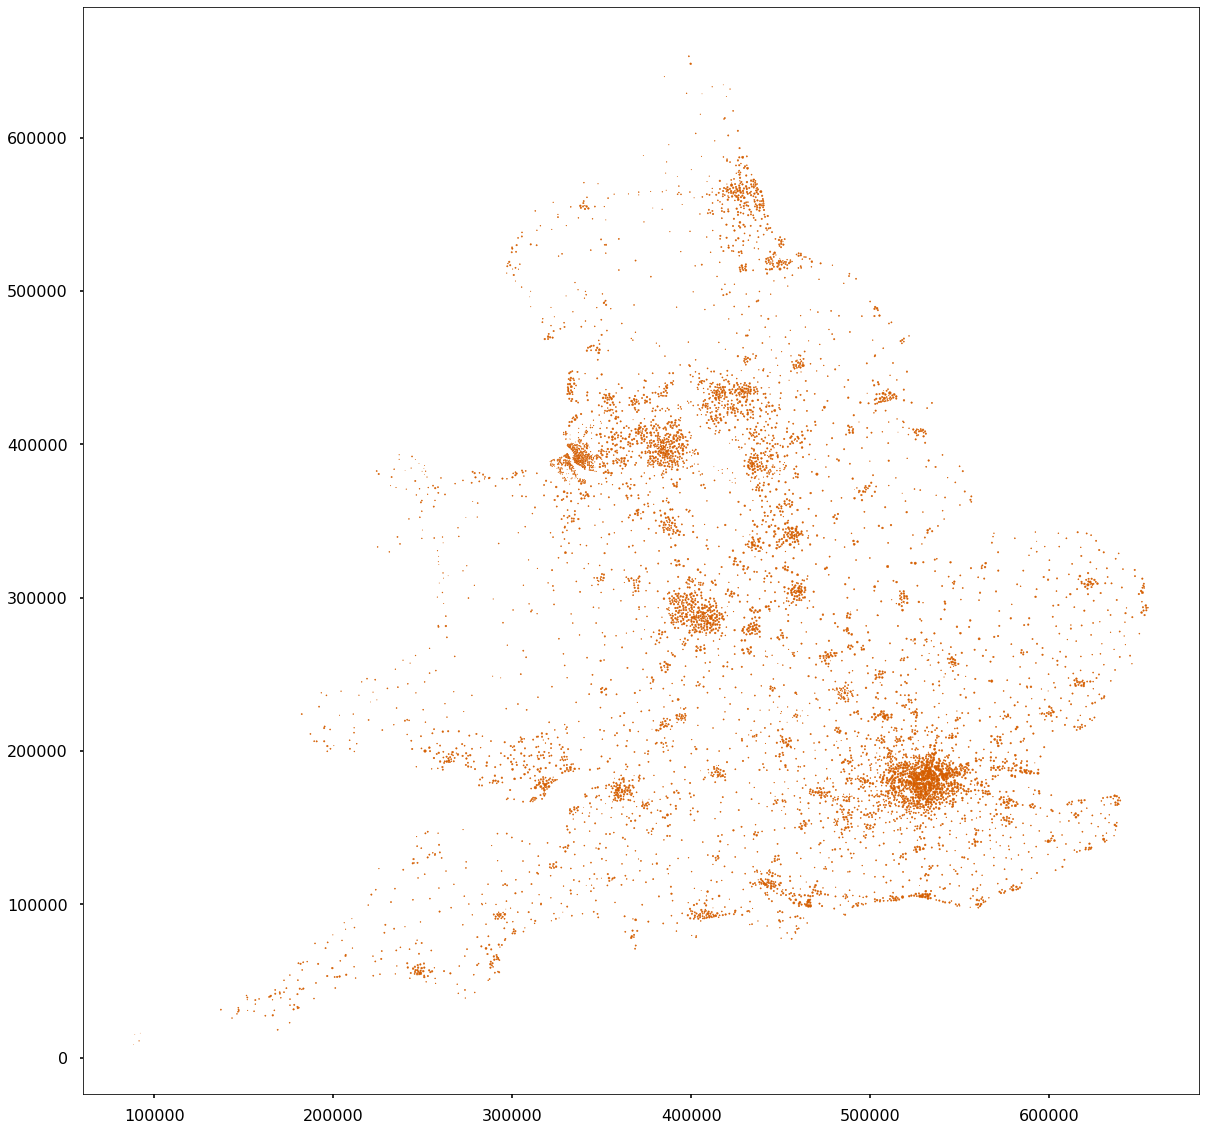

3000


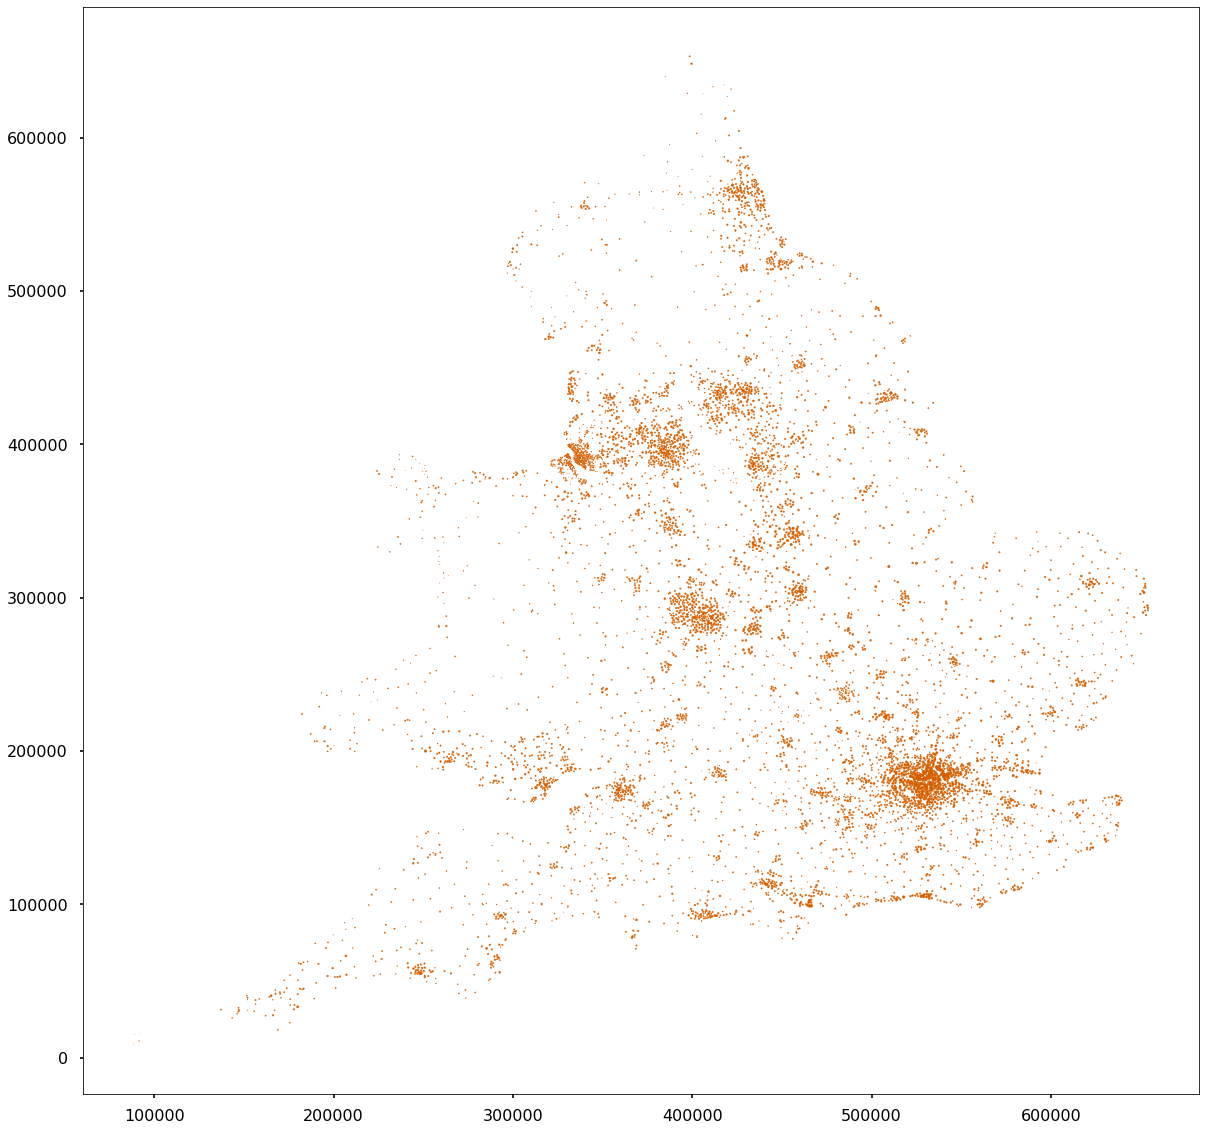

4000


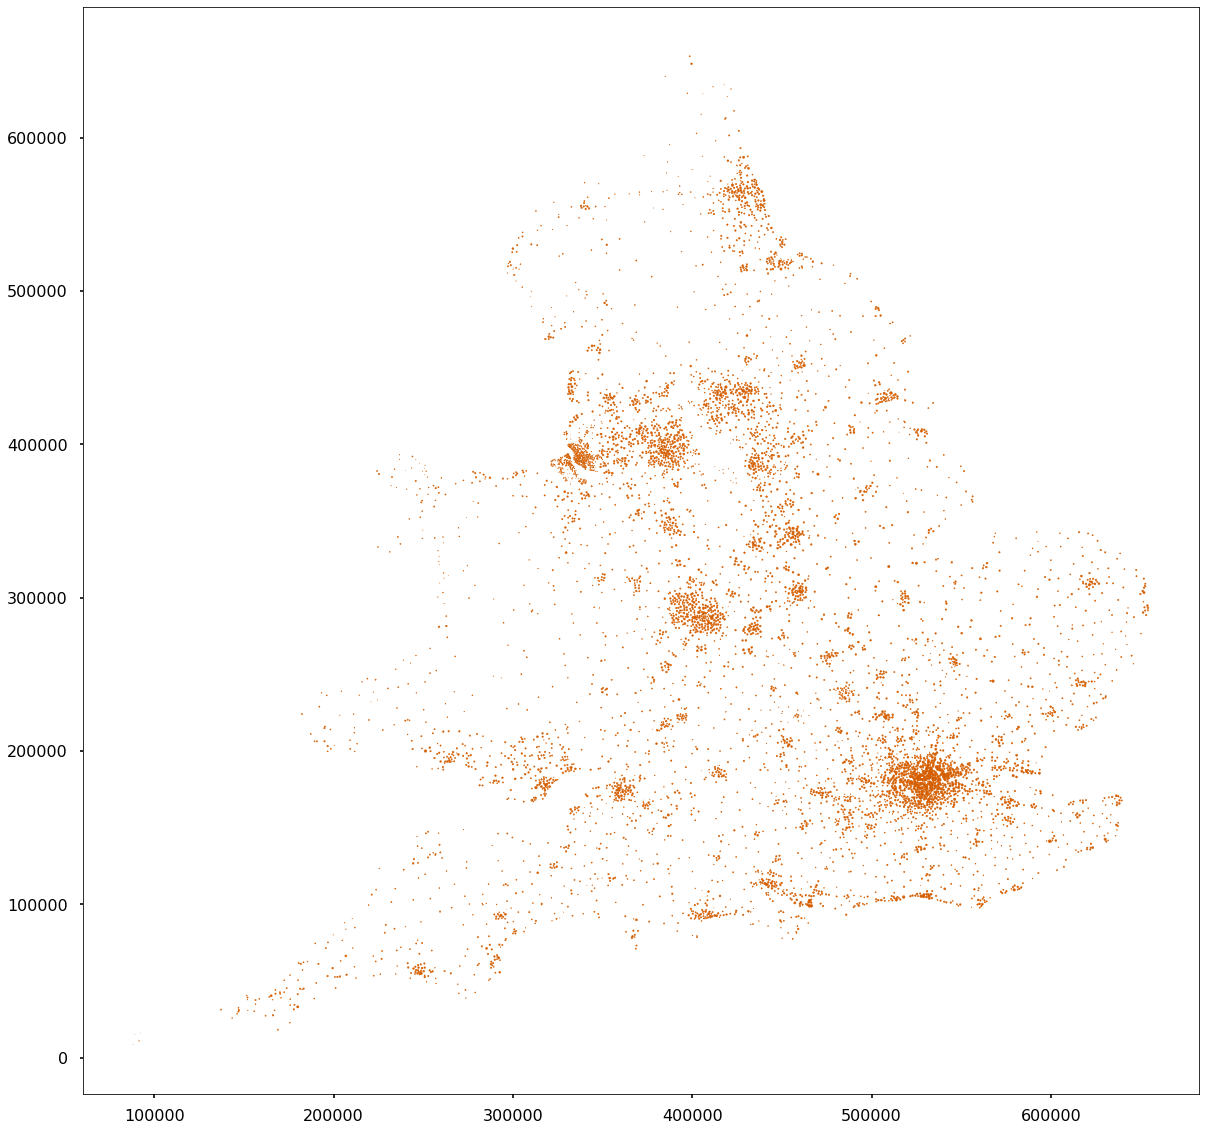

5000


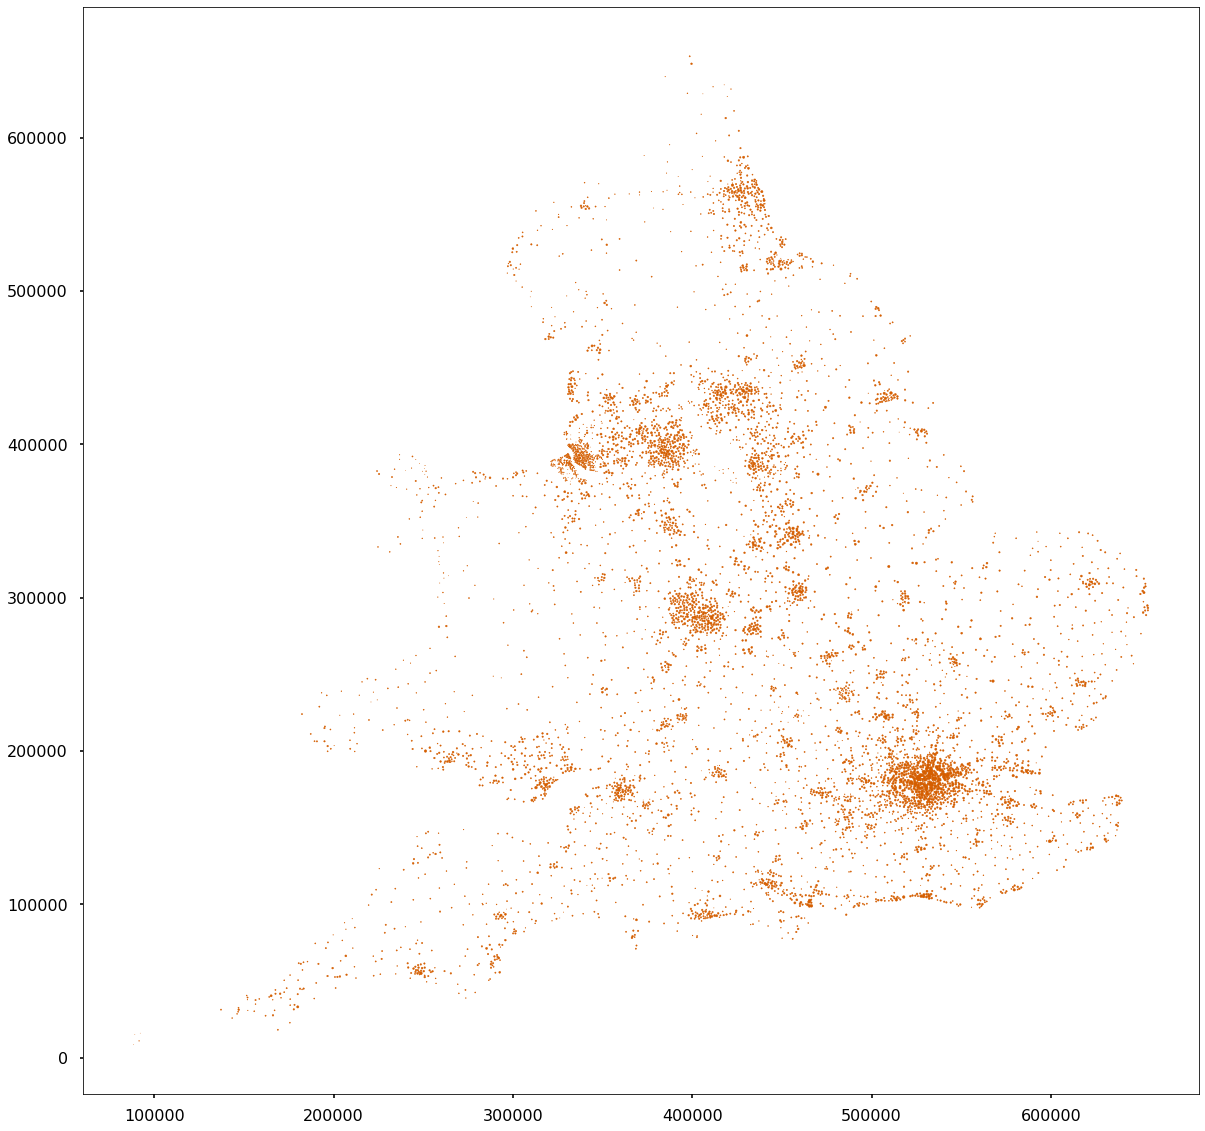

6000


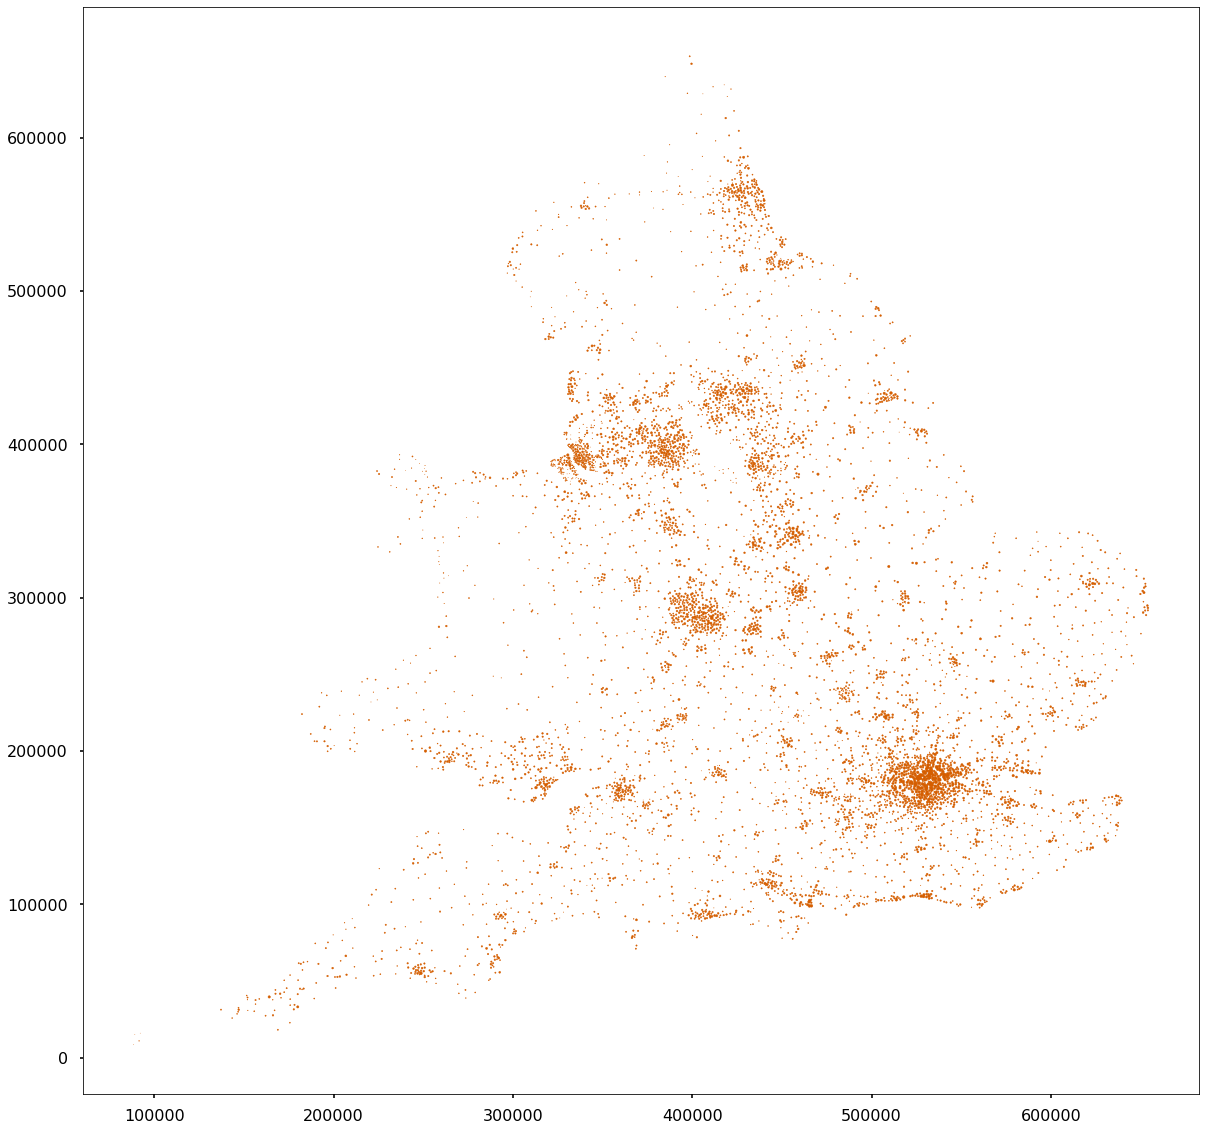

7000


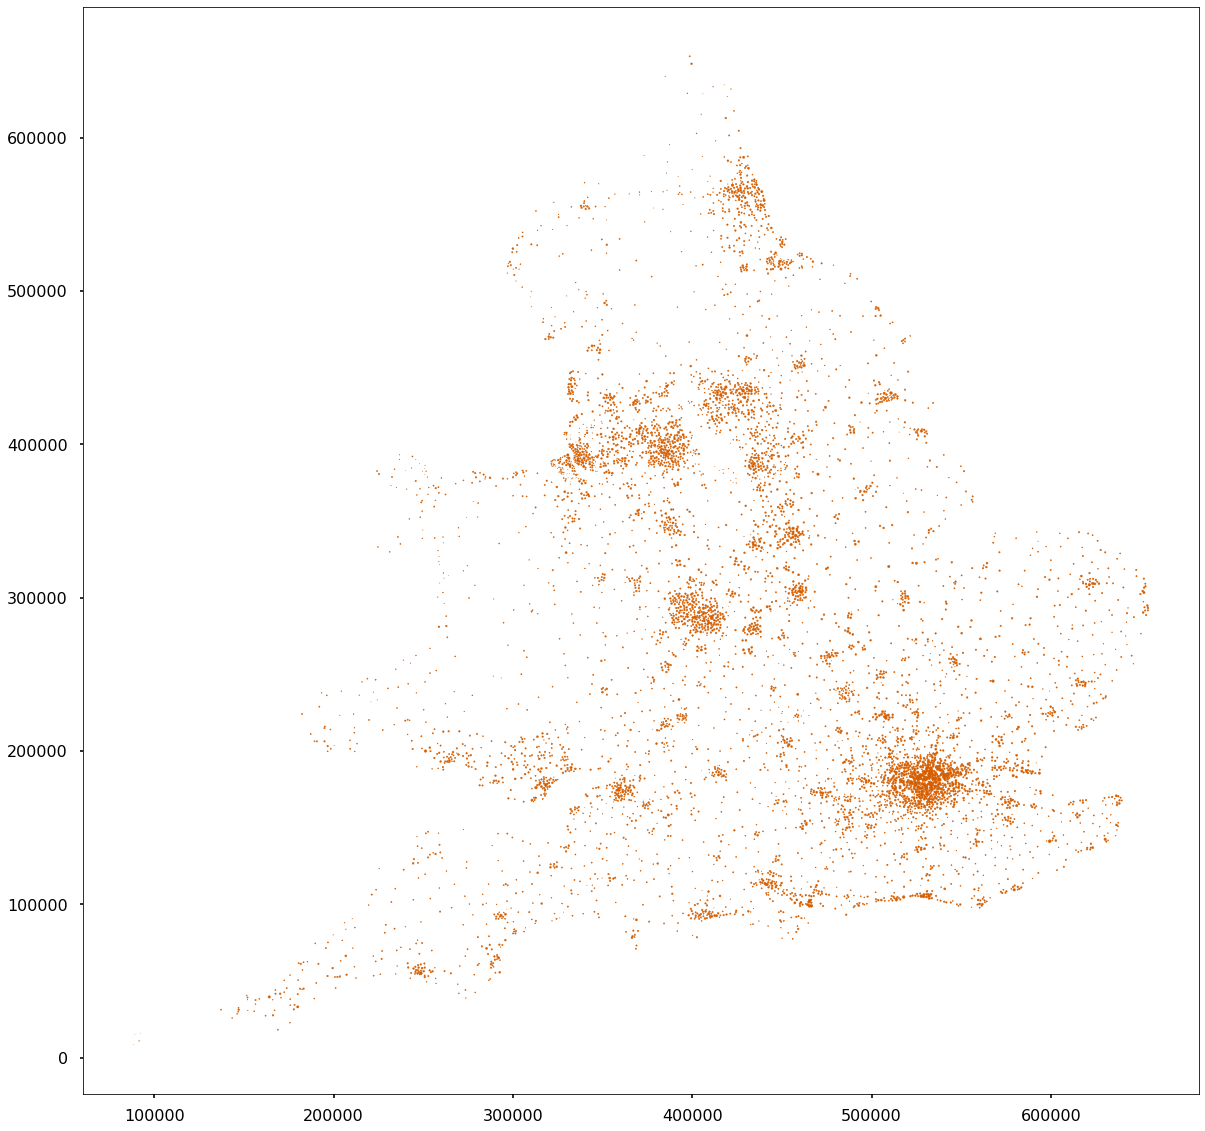

8000


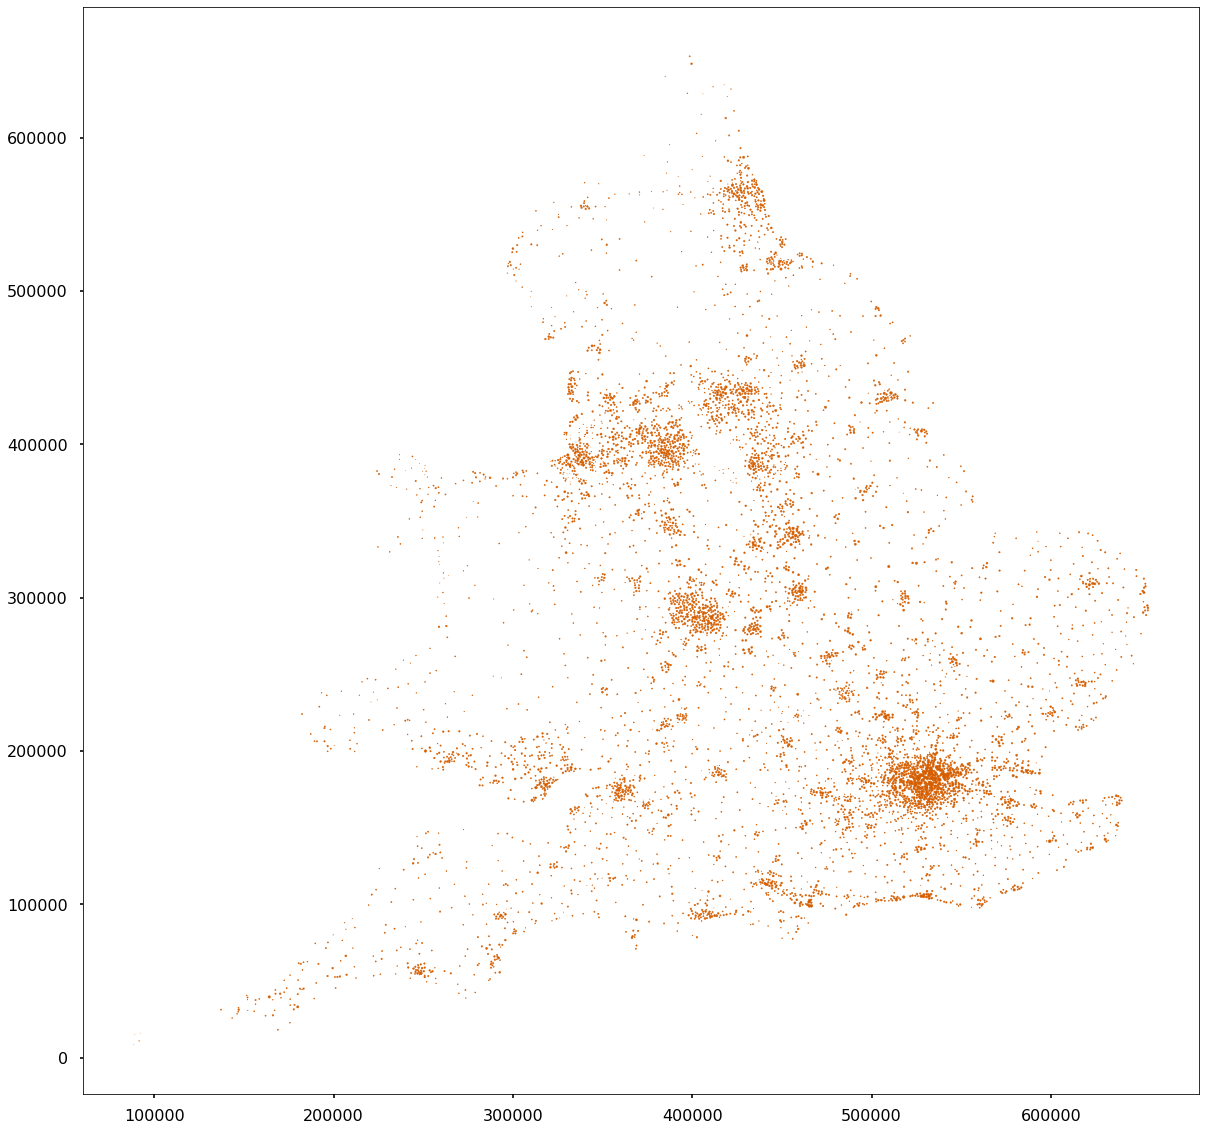

0


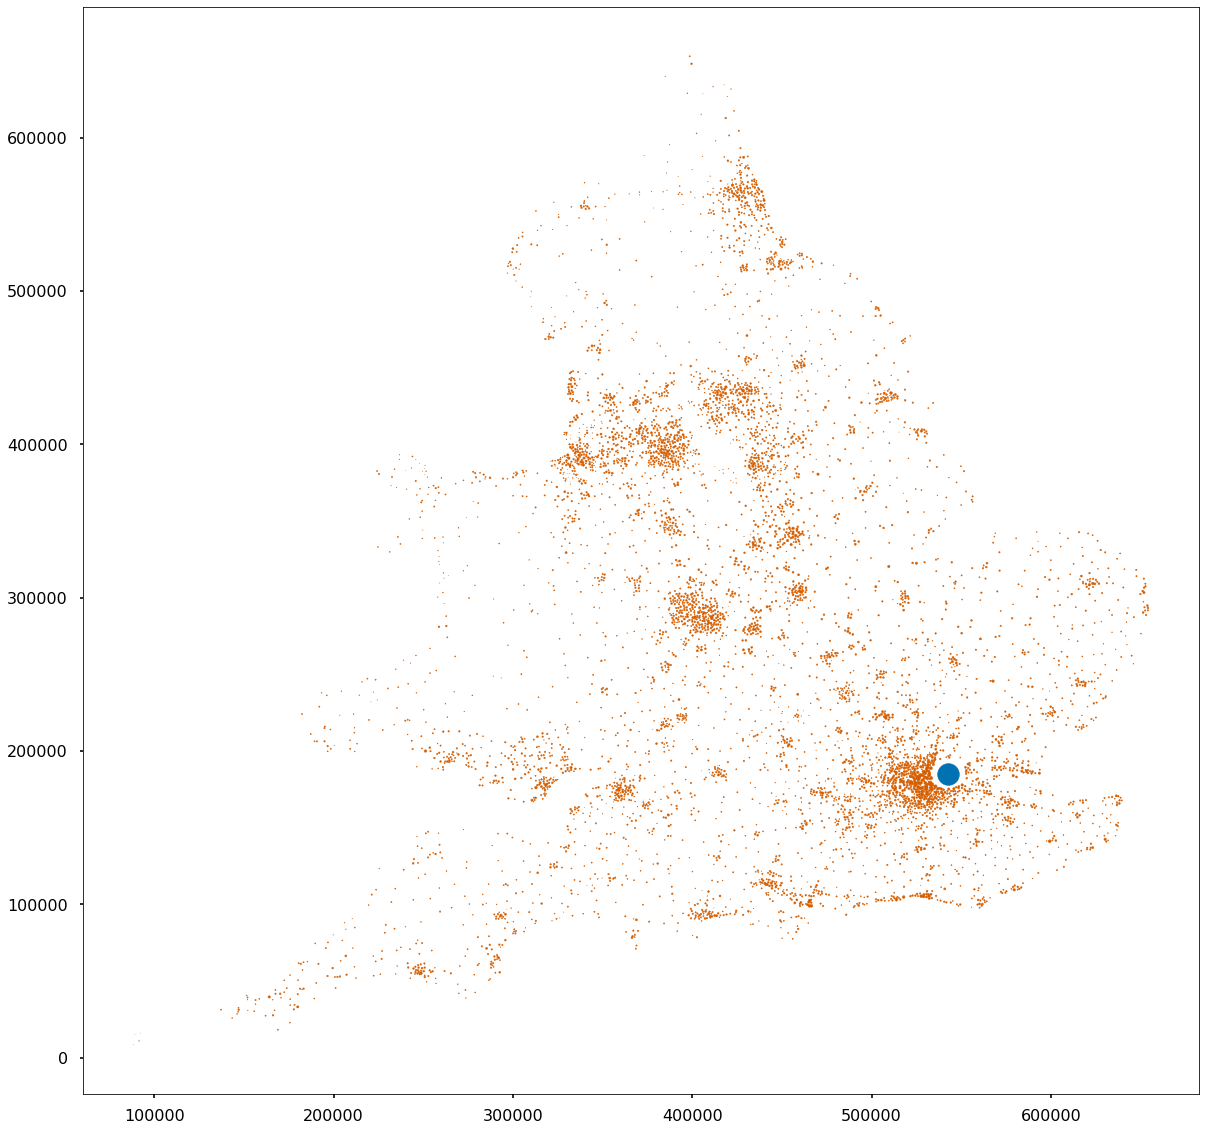

1000


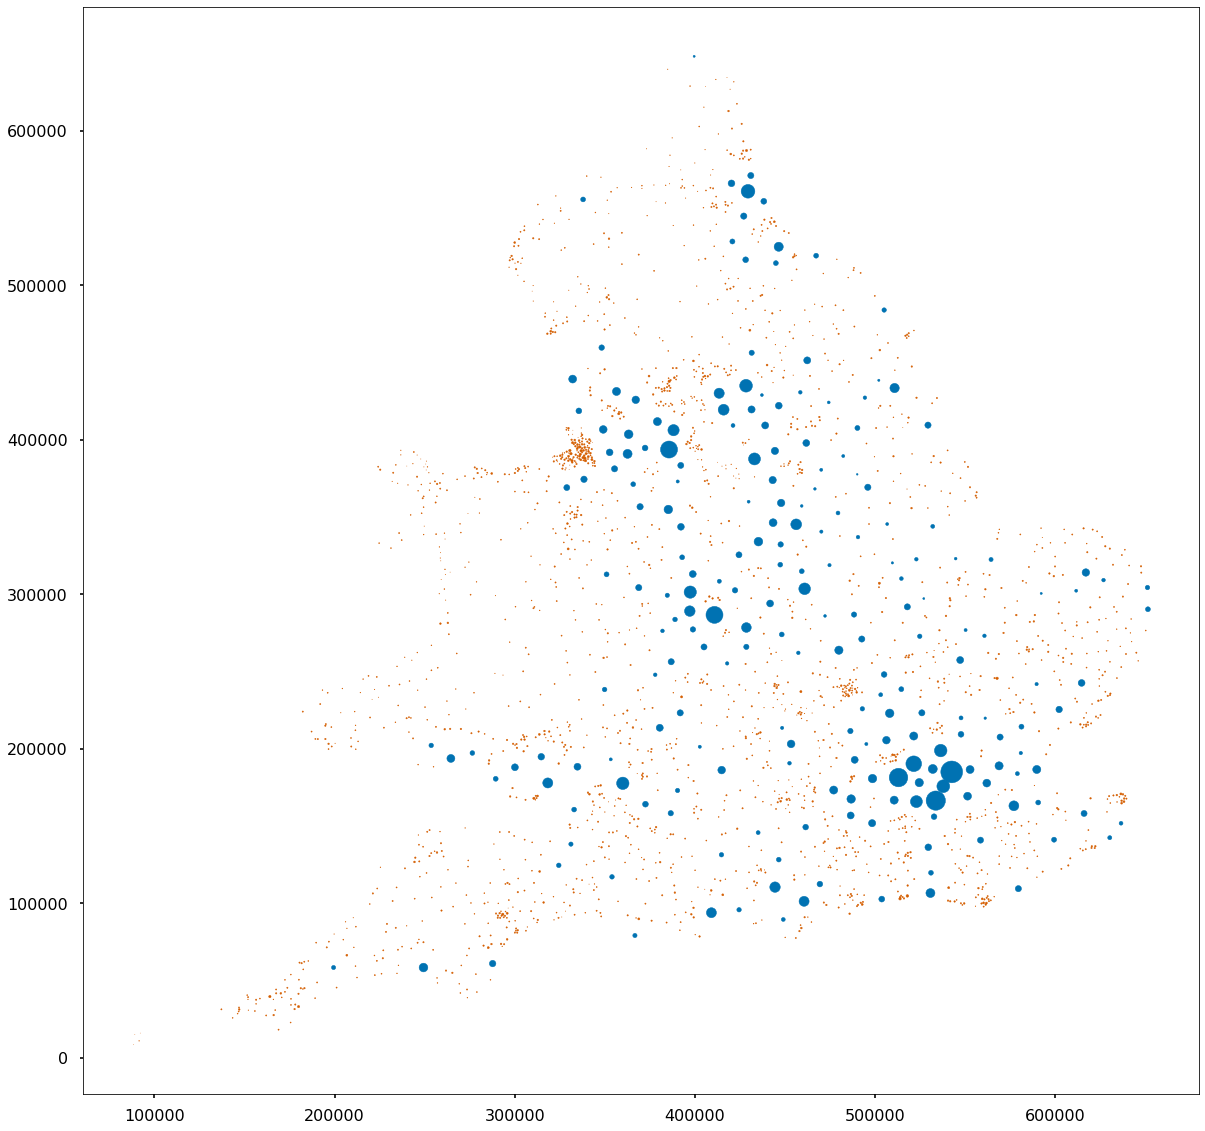

2000


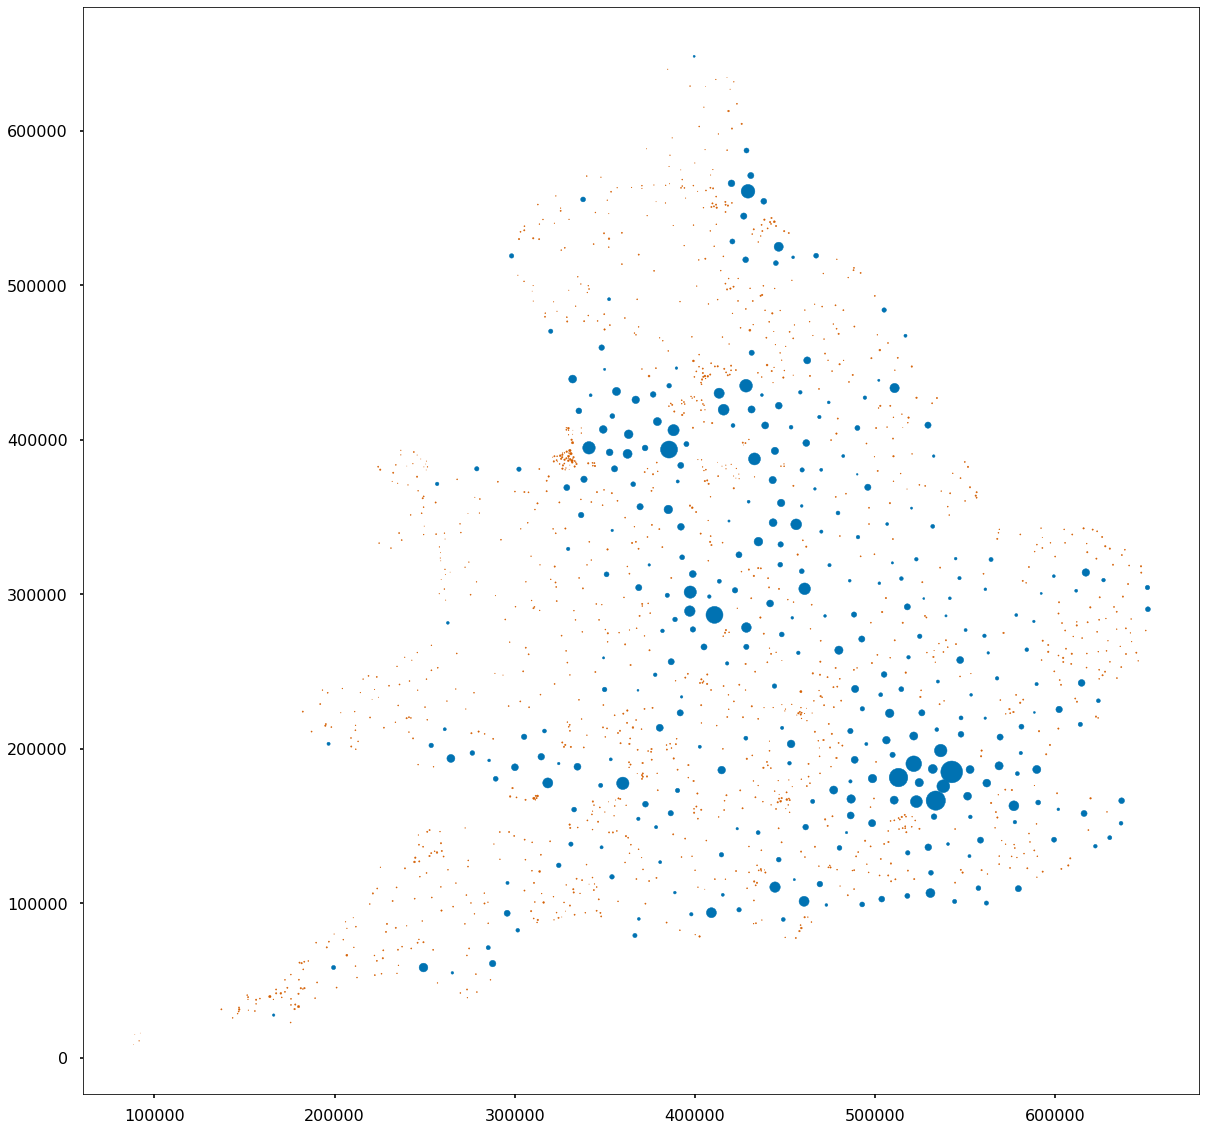

3000


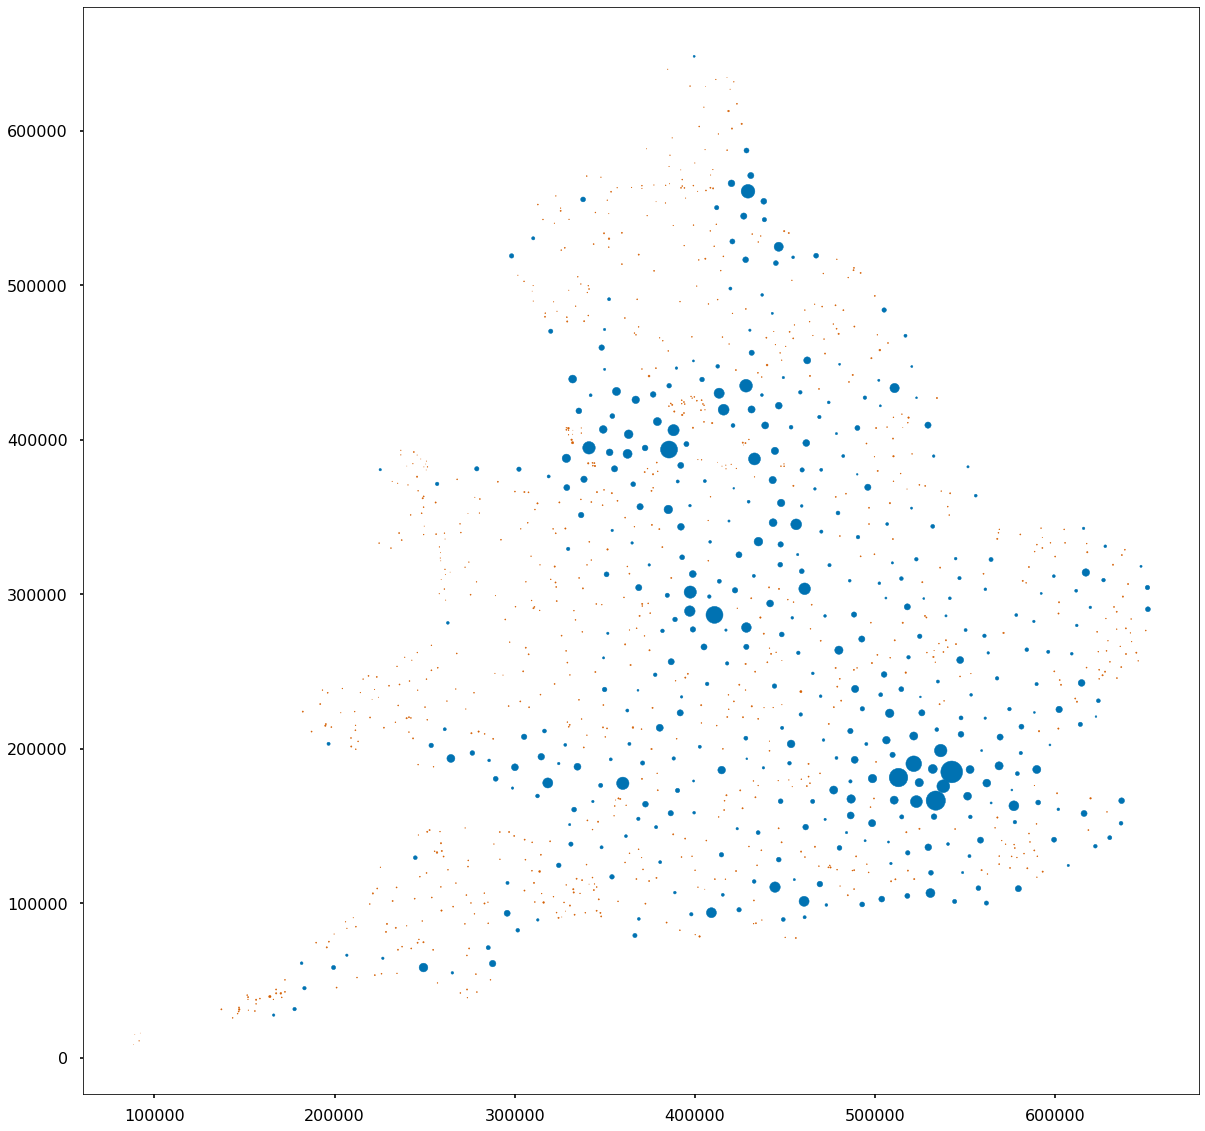

4000


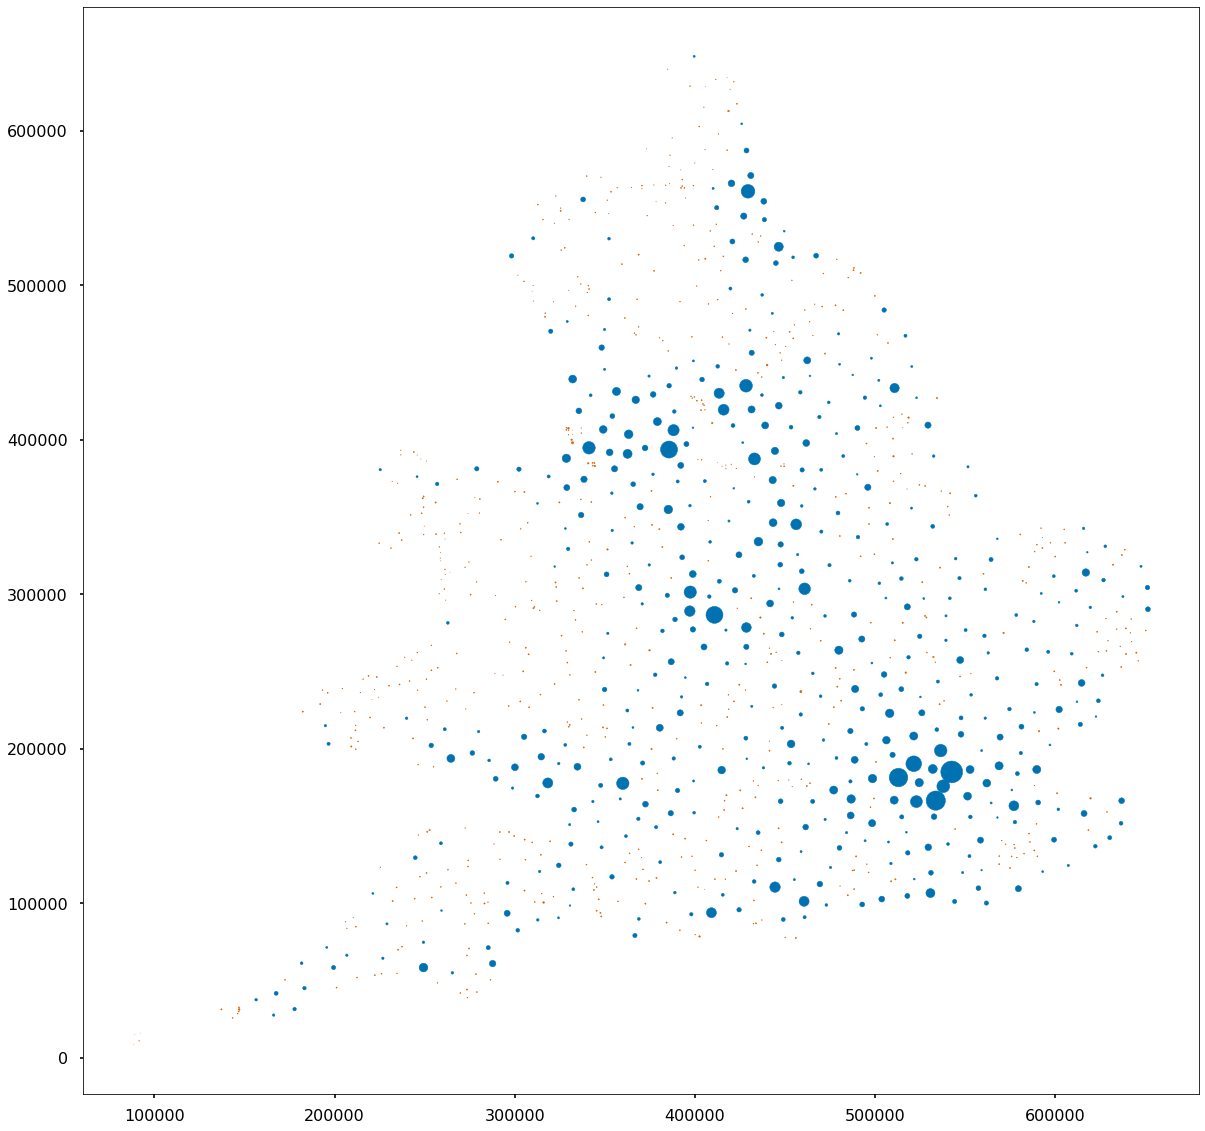

5000


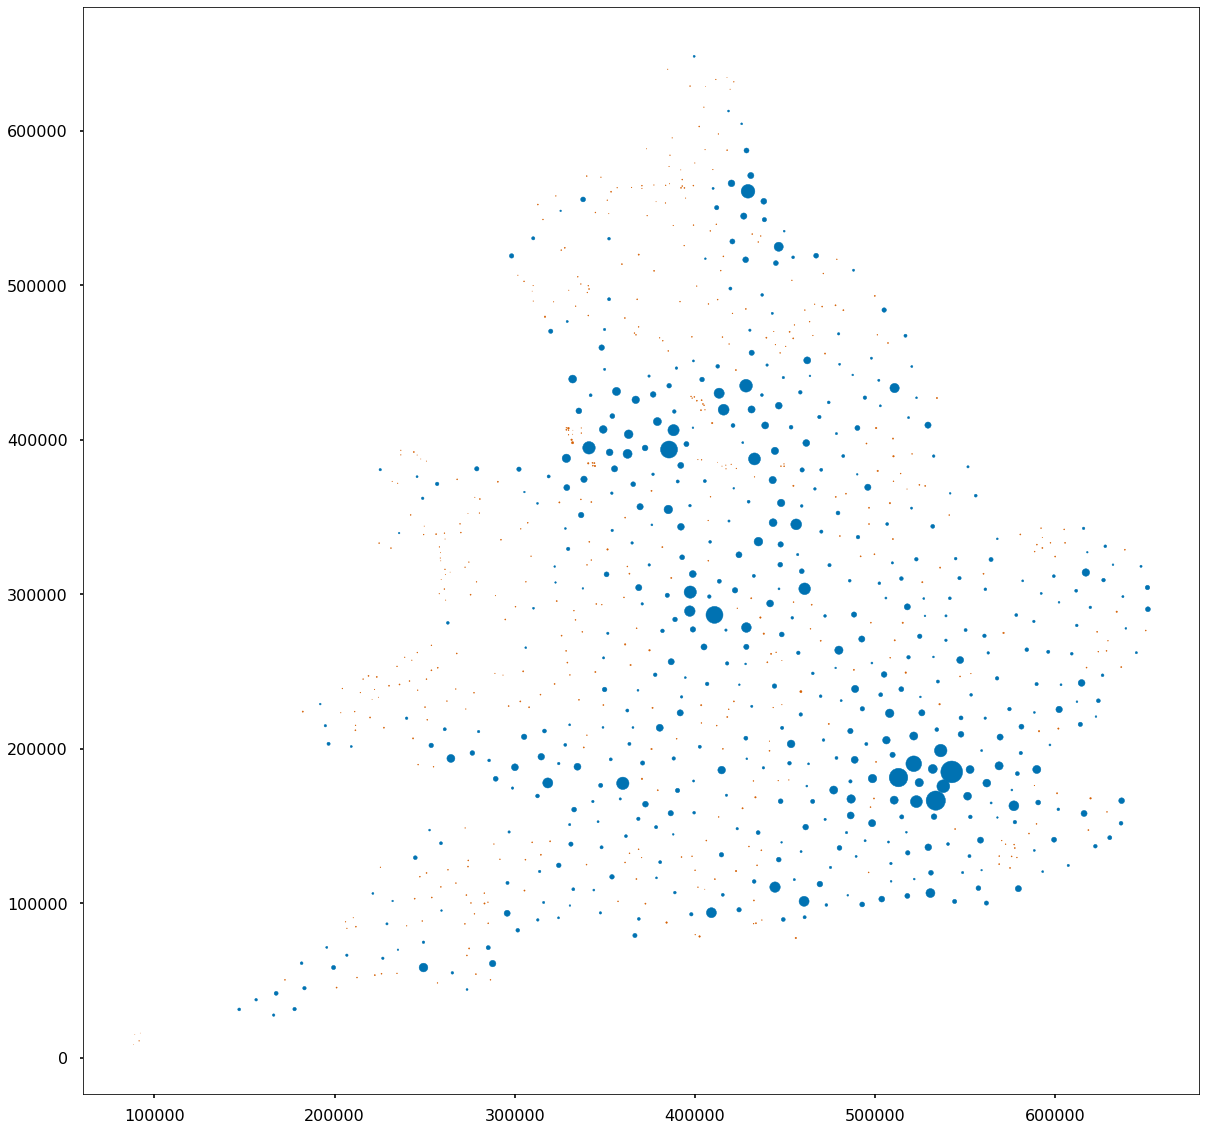

6000


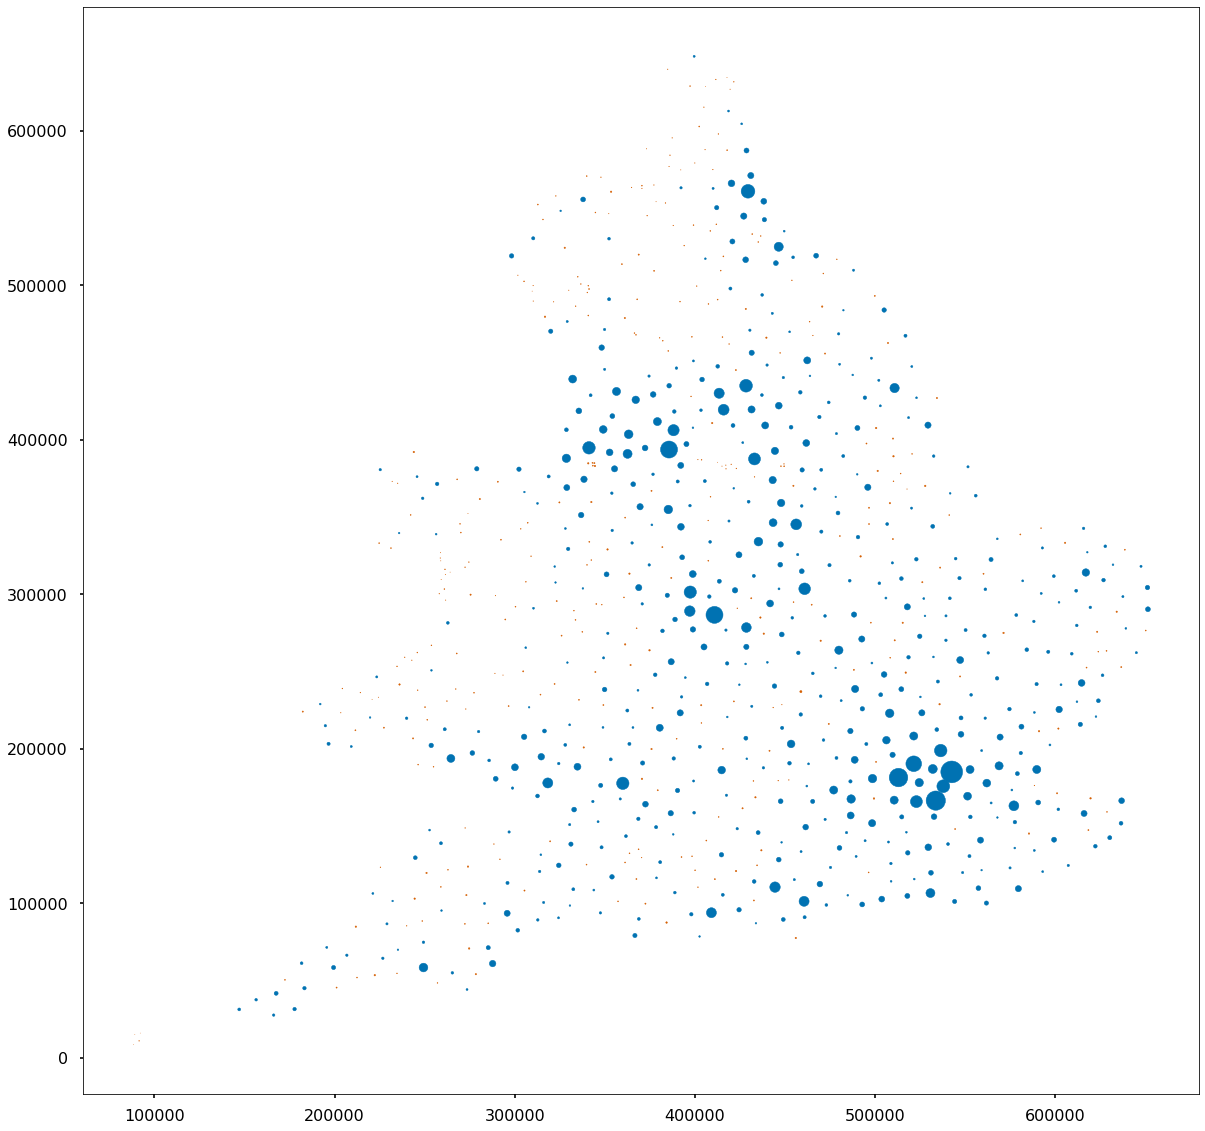

7000


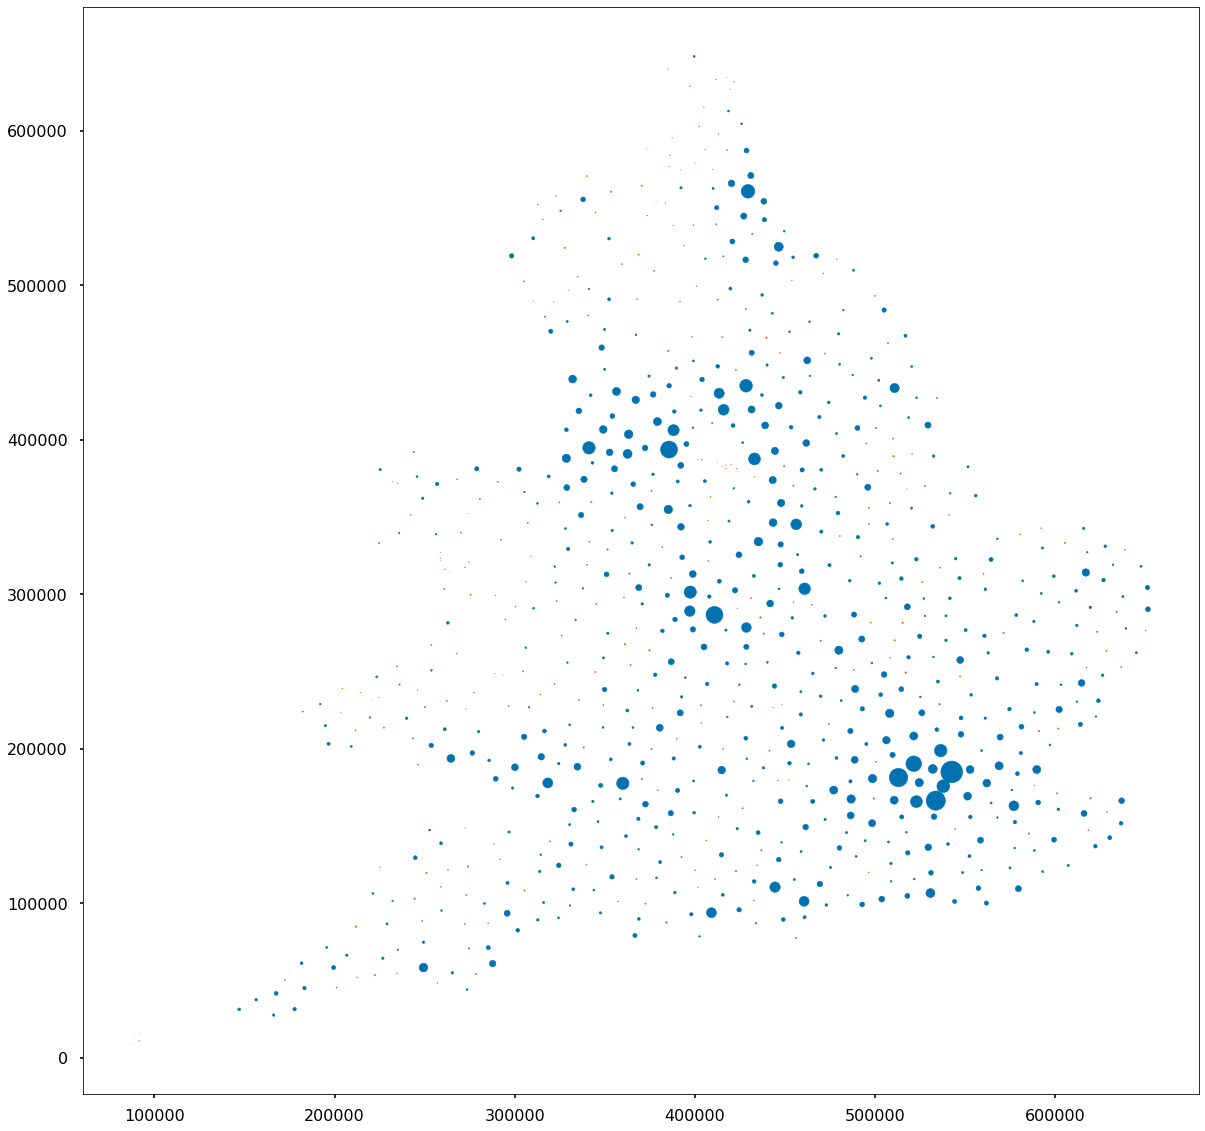

In [229]:
pop_name = "Variable: All usual residents; measures: Value"

#ds = [1000, 2000, 3000, 5000, 15000]
#sths = [60000, 40000, 30000, 10000, ]

#ds = [3000, 6000, 15000, 20000]
#sths = [50000, 30000, 20000, 10000]

#ds = [10000, 20000]
#sths = [100000, 10000]


ds = [1000, 10000]
sths = [100000, 10000]

for distance, station_th in zip(ds, sths):
    for index in list(gdf_population.index):

        if index in list(gdf_population.index):


            area = gdf_population.loc[index].geometry.buffer(distance)
            within_min_distance = gdf_population.geometry.within(area)
            within_min_distance = within_min_distance & (gdf_population.index != index) & (gdf_population.Station == False)

            _df = gdf_population[within_min_distance].append(gdf_population.loc[index])
            
            new_pop = gdf_population.at[index, pop_name] + gdf_population[within_min_distance][pop_name].sum()
            
            gdf_population.at[index, "geometry"] = Point(((_df.geometry.x * _df[pop_name]).sum() / new_pop), ((_df.geometry.y * _df[pop_name]).sum() / new_pop))

            gdf_population.at[index, pop_name] = new_pop
            
            gdf_population.drop(gdf_population[within_min_distance].index, inplace=True)

            if gdf_population.at[index, pop_name] > station_th:
                gdf_population.at[index,"Station"] = True
                
        else:
            pass#print("pass")

        if (index % 1000) == 0:
            print(index)
            fig, ax = plt.subplots(figsize=(20,20))
            ax.scatter(gdf_population[gdf_population.Station == True].Eastings, gdf_population[gdf_population.Station == True].Northings, c='C0', s=gdf_population[gdf_population.Station == True]["Variable: All usual residents; measures: Value"]/4000, label="Station")
            ax.scatter(gdf_population[gdf_population.Station == False].Eastings, gdf_population[gdf_population.Station == False].Northings, c='C2', s=gdf_population[gdf_population.Station == False]["Variable: All usual residents; measures: Value"]/4000)
            plt.show()
        

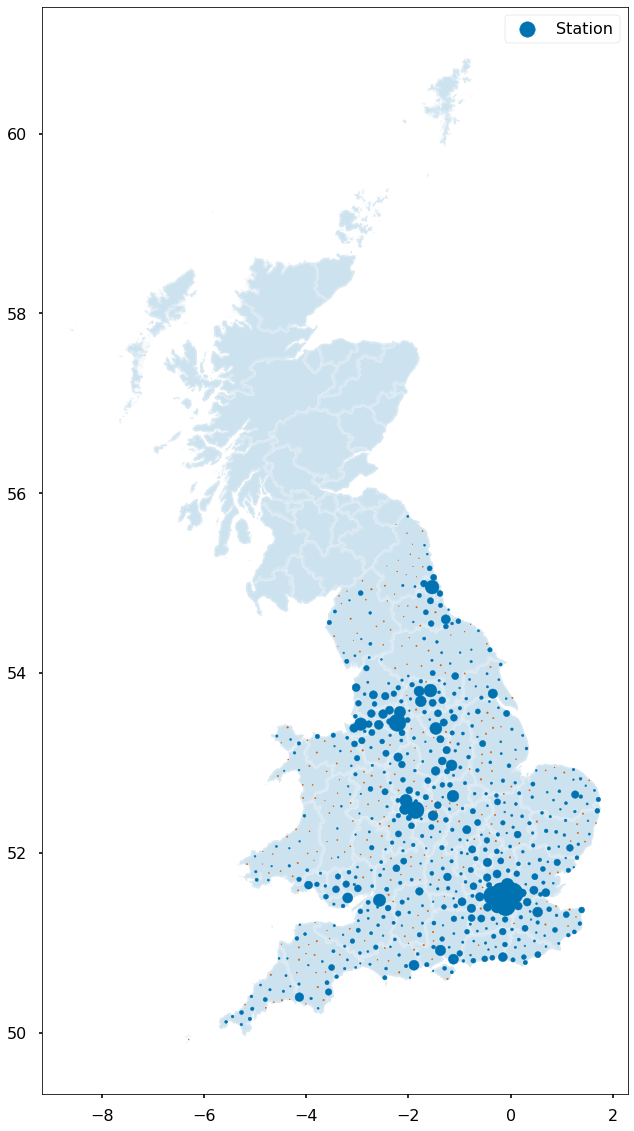

In [230]:
fig, ax = plt.subplots(figsize=(20,20))

uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg")
uk = uk.to_crs(epsg=4326)
ax = uk.plot(ax=ax,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)

gdf_population = gdf_population.to_crs(epsg=4326)

ax.scatter(gdf_population[gdf_population.Station == True].geometry.x, gdf_population[gdf_population.Station == True].geometry.y, c='C0', s=gdf_population[gdf_population.Station == True]["Variable: All usual residents; measures: Value"]/4000, label="Station")
ax.scatter(gdf_population[gdf_population.Station == False].geometry.x, gdf_population[gdf_population.Station == False].geometry.y, c='C2', s=gdf_population[gdf_population.Station == False]["Variable: All usual residents; measures: Value"]/4000)
ax.legend()

(-1.0, 1.0)

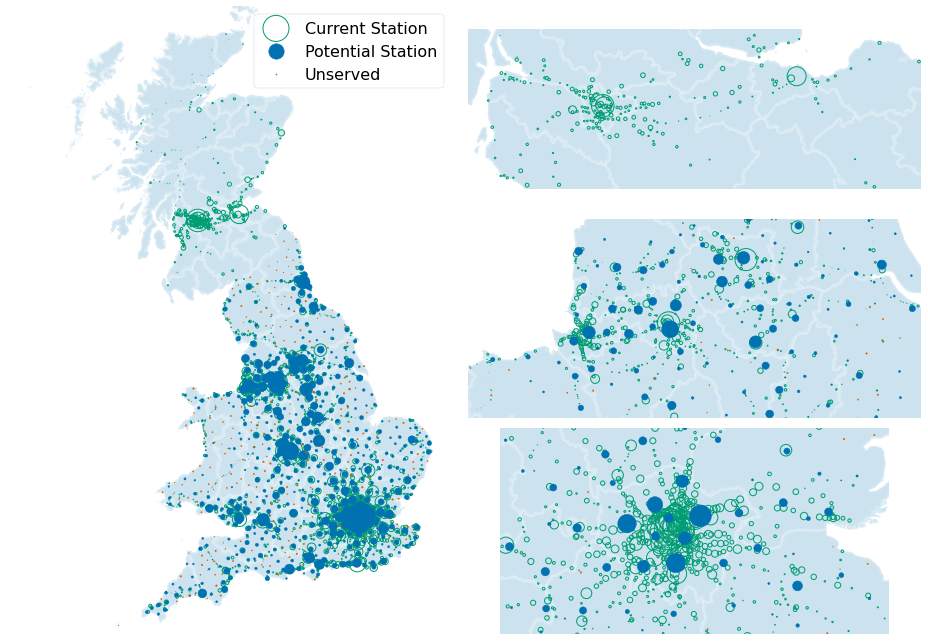

In [231]:
# Import Station Data
df_stations = pd.read_csv("Data/GB stations.csv")
df_stations["Eastings"], df_stations["Northings"] = convert_bng(df_stations.Longitude, df_stations.Latitude)
gdf = gpd.GeoDataFrame(df_stations, geometry=gpd.points_from_xy(df_stations.Longitude, df_stations.Latitude))

# Import background map
uk = gpd.read_file("Data/bdline_gpkg_gb/data/bdline_gb.gpkg")
uk = uk.to_crs(epsg=4326)


fig = plt.figure(constrained_layout=True)
gs = fig.add_gridspec(3,2)

axl = fig.add_subplot(gs[:, 0], frameon=False)
axl.set_axis_off()

axtr = fig.add_subplot(gs[0, 1], frameon=False)
axtr.set_axis_off()
axmr = fig.add_subplot(gs[1, 1], frameon=False)
axmr.set_axis_off()
axbr = fig.add_subplot(gs[2, 1], frameon=False)
axbr.set_axis_off()


def plot(ax, norm=4000):
    # Background map
    ax = uk.plot(ax=ax,  zorder=-1, color="C0", alpha=0.2, edgecolor='white', linewidth=3)
    # Current station stats
    ax.scatter(df_stations["Longitude"], df_stations["Latitude"], s=df_stations["Entries and exits 2020"]/(norm * 16), c="None", edgecolors="C1", linewidth=1, label="Current Station")
    ##ax.scatter(df_stations["Longitude"], df_stations["Latitude"], c="None", edgecolors="C4", s=0.1)
    # Population model
    ax.scatter(gdf_population[gdf_population.Station == True].geometry.x, gdf_population[gdf_population.Station == True].geometry.y, c='C0', s=gdf_population[gdf_population.Station == True]["Variable: All usual residents; measures: Value"]/norm, label="Potential Station")
    ax.scatter(gdf_population[gdf_population.Station == False].geometry.x, gdf_population[gdf_population.Station == False].geometry.y, c='C2', s=gdf_population[gdf_population.Station == False]["Variable: All usual residents; measures: Value"]/norm, label="Unserved")
    
    
    return ax 


axl = plot(axl)
axl.legend()
axl.set_ylim((49.8, 59))

axtr = plot(axtr)
axtr.set_ylim((55.6, 56.1))
axtr.set_xlim((-5, -2.5))

axmr = plot(axmr)
axmr.set_ylim((53, 54))
axmr.set_xlim((-4, 0))

axbr = plot(axbr)
axbr.set_ylim((51.2, 51.8))
axbr.set_xlim((-1, 1))


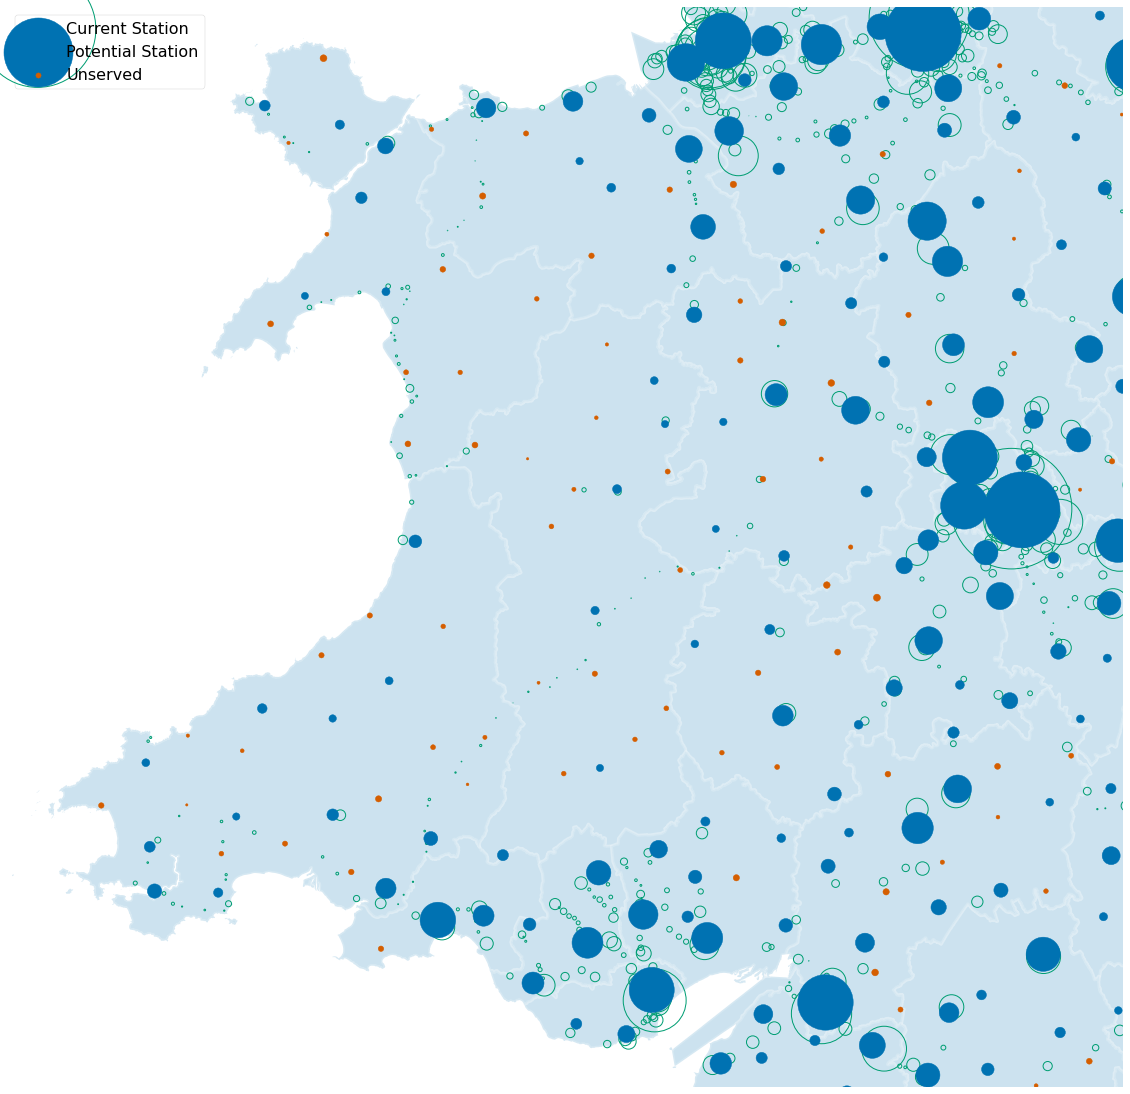

In [232]:
fig, ax = plt.subplots(figsize=(20,20))

ax = plot(ax, norm=200)
ax.set_ylim((51.3, 53.5))
ax.set_xlim((-5.5, -1.5))
ax.set_axis_off()
ax.legend()